In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import pingouin as pg
from scipy.stats import pearsonr
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
Jan = pd.read_csv('data2023/csv/January23.csv')
Feb = pd.read_csv('data2023/csv/February23.csv')
Mar = pd.read_csv('data2023/csv/March23.csv')
Apr = pd.read_csv('data2023/csv/April23.csv')
May = pd.read_csv('data2023/csv/May23.csv')

merge = pd.concat([Jan, Feb, Mar, Apr, May], axis=0)

## Inspection of Data

In [3]:
merge.head(10)

,Sl No,Rationcard no,Cardtype,Member Name,Date of Transaction,Transaction through,Rice(Kg),Wheat(Kg),K. Oil(ltr),Salt(Kg),Sugar(Kg),PMGKAY Rice(Kg),PMGKAY Wheat(Kg)
0,1,202006780109,P.H.,विमला देवी,14-03-2023 11:39:15 AM,UID,8,2,0,0,0,0,0
1,2,202006980621,P.H.,कीमिया देवी,28-02-2023 09:14:43 AM,UID,12,3,0,0,0,0,0
2,3,202005724101,P.H.,अोम प्रकाश रवानी,27-02-2023 01:18:11 PM,UID,36,9,0,0,0,0,0
3,4,202007052307,P.H.,राकेश कुमार रवानी,24-02-2023 11:17:12 AM,UID,12,3,0,0,0,0,0
4,5,202006980613,P.H.,उमा पद रवानी,24-02-2023 09:39:52 AM,UID,12,3,0,0,0,0,0
5,6,202005706997,P.H.,अश्वनी प्रामाणिक,21-02-2023 11:48:29 AM,UID,32,8,0,0,0,0,0
6,7,202006953879,P.H.,मधुबाला देवी,31-01-2023 01:55:24 PM,UID,4,1,0,0,0,0,0
7,8,202005709231,P.H.,अर्जुन रवानी,31-01-2023 12:41:06 PM,UID,20,5,0,0,0,0,0
8,9,202800223079,P.H.,SHIV SHANKAR PRAMANIK,31-01-2023 10:11:29 AM,UID,4,1,0,0,0,0,0
9,10,202800006921,P.H.,करीना कुमारी,31-01-2023 09:27:22 AM,UID,12,3,0,0,0,0,0


In [4]:
merge.tail(10)

,Sl No,Rationcard no,Cardtype,Member Name,Date of Transaction,Transaction through,Rice(Kg),Wheat(Kg),K. Oil(ltr),Salt(Kg),Sugar(Kg),PMGKAY Rice(Kg),PMGKAY Wheat(Kg)
374,375,202006980559,P.H.,मीली देवी,16-05-2023 09:08:42 AM,UID,28,7,0,0,0,0,0
375,376,202006870495,P.H.,राम अवदेश राम,16-05-2023 09:06:19 AM,UID,16,4,0,0,0,0,0
376,377,202005095820,AAY,शकुन्तला देवी,16-05-2023 09:03:49 AM,UID,28,7,0,0,0,0,0
377,378,202001798469,P.H.,झुल देवी,16-05-2023 09:01:07 AM,UID,4,1,0,0,0,0,0
378,379,202006980721,P.H.,कुंती कुमारी रवानी,16-05-2023 08:58:28 AM,UID,12,3,0,0,0,0,0
379,380,202006780648,P.H.,गोउर चन्द्र रवानी,16-05-2023 08:55:13 AM,UID,20,5,0,0,0,0,0
380,381,202007015957,P.H.,दिनेश रवानी,16-05-2023 08:48:23 AM,UID,20,5,0,0,0,0,0
381,382,202006971291,P.H.,किरण देवी,16-05-2023 08:45:19 AM,UID,24,6,0,0,0,0,0
382,383,202001798553,P.H.,करमु कुंभकार,16-05-2023 08:42:32 AM,UID,16,4,0,0,0,0,0
383,384,202006952394,P.H.,माया देवी,16-05-2023 08:38:26 AM,UID,12,3,0,0,0,0,0


In [5]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 0 to 383
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sl No                1940 non-null   int64 
 1   Rationcard no        1940 non-null   int64 
 2   Cardtype             1940 non-null   object
 3   Member Name          1940 non-null   object
 4   Date of Transaction  1940 non-null   object
 5   Transaction through  1940 non-null   object
 6   Rice(Kg)             1940 non-null   int64 
 7   Wheat(Kg)            1940 non-null   int64 
 8   K. Oil(ltr)          1940 non-null   int64 
 9   Salt(Kg)             1940 non-null   int64 
 10  Sugar(Kg)            1940 non-null   int64 
 11  PMGKAY Rice(Kg)      1940 non-null   int64 
 12  PMGKAY Wheat(Kg)     1940 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 212.2+ KB


In [6]:
merge.shape

(1940, 13)

In [7]:
merge.columns

Index(['Sl No', 'Rationcard no', 'Cardtype', 'Member Name',
       'Date of Transaction', 'Transaction through', 'Rice(Kg)', 'Wheat(Kg)',
       'K. Oil(ltr)', 'Salt(Kg)', 'Sugar(Kg)', 'PMGKAY Rice(Kg)',
       'PMGKAY Wheat(Kg)'],
      dtype='object')

In [8]:
merge.dtypes

Sl No                   int64
Rationcard no           int64
Cardtype               object
Member Name            object
Date of Transaction    object
Transaction through    object
Rice(Kg)                int64
Wheat(Kg)               int64
K. Oil(ltr)             int64
Salt(Kg)                int64
Sugar(Kg)               int64
PMGKAY Rice(Kg)         int64
PMGKAY Wheat(Kg)        int64
dtype: object

In [9]:
merge.isnull()

,Sl No,Rationcard no,Cardtype,Member Name,Date of Transaction,Transaction through,Rice(Kg),Wheat(Kg),K. Oil(ltr),Salt(Kg),Sugar(Kg),PMGKAY Rice(Kg),PMGKAY Wheat(Kg)
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,False,False,False,False,False,False,False,False,False,False,False,False,False
380,False,False,False,False,False,False,False,False,False,False,False,False,False
381,False,False,False,False,False,False,False,False,False,False,False,False,False
382,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
merge.describe()

,Sl No,Rationcard no,Rice(Kg),Wheat(Kg),K. Oil(ltr),Salt(Kg),Sugar(Kg),PMGKAY Rice(Kg),PMGKAY Wheat(Kg)
count,1940.000000,1.940000e+03,1940.000000,1940.000000,1940.0,1940.0,1940.0,1940.0,1940.0
mean,194.510825,2.020231e+11,18.125773,4.531443,0.0,0.0,0.0,0.0,0.0
std,112.053174,1.184925e+08,7.749072,1.937268,0.0,0.0,0.0,0.0,0.0
min,1.000000,2.020004e+11,4.000000,1.000000,0.0,0.0,0.0,0.0,0.0
25%,97.750000,2.020018e+11,12.000000,3.000000,0.0,0.0,0.0,0.0,0.0
50%,194.500000,2.020068e+11,16.000000,4.000000,0.0,0.0,0.0,0.0,0.0
75%,291.250000,2.020070e+11,20.000000,5.000000,0.0,0.0,0.0,0.0,0.0
max,391.000000,2.028009e+11,56.000000,14.000000,0.0,0.0,0.0,0.0,0.0


In [11]:
merge.nunique()

Sl No                   391
Rationcard no           405
Cardtype                  2
Member Name             490
Date of Transaction    1940
Transaction through       3
Rice(Kg)                 13
Wheat(Kg)                13
K. Oil(ltr)               1
Salt(Kg)                  1
Sugar(Kg)                 1
PMGKAY Rice(Kg)           1
PMGKAY Wheat(Kg)          1
dtype: int64

In [12]:
merge.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
379    False
380    False
381    False
382    False
383    False
Length: 1940, dtype: bool

## Cleaning of Data

In [13]:
merge.drop(['PMGKAY Rice(Kg)', 'PMGKAY Wheat(Kg)'], axis=1, inplace=True)

In [14]:
merge

,Sl No,Rationcard no,Cardtype,Member Name,Date of Transaction,Transaction through,Rice(Kg),Wheat(Kg),K. Oil(ltr),Salt(Kg),Sugar(Kg)
0,1,202006780109,P.H.,विमला देवी,14-03-2023 11:39:15 AM,UID,8,2,0,0,0
1,2,202006980621,P.H.,कीमिया देवी,28-02-2023 09:14:43 AM,UID,12,3,0,0,0
2,3,202005724101,P.H.,अोम प्रकाश रवानी,27-02-2023 01:18:11 PM,UID,36,9,0,0,0
3,4,202007052307,P.H.,राकेश कुमार रवानी,24-02-2023 11:17:12 AM,UID,12,3,0,0,0
4,5,202006980613,P.H.,उमा पद रवानी,24-02-2023 09:39:52 AM,UID,12,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
379,380,202006780648,P.H.,गोउर चन्द्र रवानी,16-05-2023 08:55:13 AM,UID,20,5,0,0,0
380,381,202007015957,P.H.,दिनेश रवानी,16-05-2023 08:48:23 AM,UID,20,5,0,0,0
381,382,202006971291,P.H.,किरण देवी,16-05-2023 08:45:19 AM,UID,24,6,0,0,0
382,383,202001798553,P.H.,करमु कुंभकार,16-05-2023 08:42:32 AM,UID,16,4,0,0,0


In [15]:
# Split the "Date of Transaction" column into separate date and time columns
merge[['Date', 'Time']] = merge['Date of Transaction'].str.split(' ', 1, expand=True)

C:\Users\imsan\AppData\Local\Temp\ipykernel_2492\1826856108.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  merge[['Date', 'Time']] = merge['Date of Transaction'].str.split(' ', 1, expand=True)


In [16]:
merge

,Sl No,Rationcard no,Cardtype,Member Name,Date of Transaction,Transaction through,Rice(Kg),Wheat(Kg),K. Oil(ltr),Salt(Kg),Sugar(Kg),Date,Time
0,1,202006780109,P.H.,विमला देवी,14-03-2023 11:39:15 AM,UID,8,2,0,0,0,14-03-2023,11:39:15 AM
1,2,202006980621,P.H.,कीमिया देवी,28-02-2023 09:14:43 AM,UID,12,3,0,0,0,28-02-2023,09:14:43 AM
2,3,202005724101,P.H.,अोम प्रकाश रवानी,27-02-2023 01:18:11 PM,UID,36,9,0,0,0,27-02-2023,01:18:11 PM
3,4,202007052307,P.H.,राकेश कुमार रवानी,24-02-2023 11:17:12 AM,UID,12,3,0,0,0,24-02-2023,11:17:12 AM
4,5,202006980613,P.H.,उमा पद रवानी,24-02-2023 09:39:52 AM,UID,12,3,0,0,0,24-02-2023,09:39:52 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,202006780648,P.H.,गोउर चन्द्र रवानी,16-05-2023 08:55:13 AM,UID,20,5,0,0,0,16-05-2023,08:55:13 AM
380,381,202007015957,P.H.,दिनेश रवानी,16-05-2023 08:48:23 AM,UID,20,5,0,0,0,16-05-2023,08:48:23 AM
381,382,202006971291,P.H.,किरण देवी,16-05-2023 08:45:19 AM,UID,24,6,0,0,0,16-05-2023,08:45:19 AM
382,383,202001798553,P.H.,करमु कुंभकार,16-05-2023 08:42:32 AM,UID,16,4,0,0,0,16-05-2023,08:42:32 AM


In [17]:
# Add a new column "ID" with unique identifiers
merge['ID'] = merge.reset_index().index + 1

In [18]:
merge

,Sl No,Rationcard no,Cardtype,Member Name,Date of Transaction,Transaction through,Rice(Kg),Wheat(Kg),K. Oil(ltr),Salt(Kg),Sugar(Kg),Date,Time,ID
0,1,202006780109,P.H.,विमला देवी,14-03-2023 11:39:15 AM,UID,8,2,0,0,0,14-03-2023,11:39:15 AM,1
1,2,202006980621,P.H.,कीमिया देवी,28-02-2023 09:14:43 AM,UID,12,3,0,0,0,28-02-2023,09:14:43 AM,2
2,3,202005724101,P.H.,अोम प्रकाश रवानी,27-02-2023 01:18:11 PM,UID,36,9,0,0,0,27-02-2023,01:18:11 PM,3
3,4,202007052307,P.H.,राकेश कुमार रवानी,24-02-2023 11:17:12 AM,UID,12,3,0,0,0,24-02-2023,11:17:12 AM,4
4,5,202006980613,P.H.,उमा पद रवानी,24-02-2023 09:39:52 AM,UID,12,3,0,0,0,24-02-2023,09:39:52 AM,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,202006780648,P.H.,गोउर चन्द्र रवानी,16-05-2023 08:55:13 AM,UID,20,5,0,0,0,16-05-2023,08:55:13 AM,1936
380,381,202007015957,P.H.,दिनेश रवानी,16-05-2023 08:48:23 AM,UID,20,5,0,0,0,16-05-2023,08:48:23 AM,1937
381,382,202006971291,P.H.,किरण देवी,16-05-2023 08:45:19 AM,UID,24,6,0,0,0,16-05-2023,08:45:19 AM,1938
382,383,202001798553,P.H.,करमु कुंभकार,16-05-2023 08:42:32 AM,UID,16,4,0,0,0,16-05-2023,08:42:32 AM,1939


In [19]:
total_slno = merge['ID'].nunique()
total_slno

1940

In [20]:
# Rearrange the columns
new_order = ['Sl No',
             'ID',
             'Rationcard no', 
             'Cardtype', 
             'Member Name', 
             'Date of Transaction', 
             'Date', 
             'Time', 
             'Rice(Kg)', 
             'Wheat(Kg)', 
             'K. Oil(ltr)', 
             'Salt(Kg)', 
             'Sugar(Kg)']

merge = merge[new_order]

In [21]:
merge.head(10)

,Sl No,ID,Rationcard no,Cardtype,Member Name,Date of Transaction,Date,Time,Rice(Kg),Wheat(Kg),K. Oil(ltr),Salt(Kg),Sugar(Kg)
0,1,1,202006780109,P.H.,विमला देवी,14-03-2023 11:39:15 AM,14-03-2023,11:39:15 AM,8,2,0,0,0
1,2,2,202006980621,P.H.,कीमिया देवी,28-02-2023 09:14:43 AM,28-02-2023,09:14:43 AM,12,3,0,0,0
2,3,3,202005724101,P.H.,अोम प्रकाश रवानी,27-02-2023 01:18:11 PM,27-02-2023,01:18:11 PM,36,9,0,0,0
3,4,4,202007052307,P.H.,राकेश कुमार रवानी,24-02-2023 11:17:12 AM,24-02-2023,11:17:12 AM,12,3,0,0,0
4,5,5,202006980613,P.H.,उमा पद रवानी,24-02-2023 09:39:52 AM,24-02-2023,09:39:52 AM,12,3,0,0,0
5,6,6,202005706997,P.H.,अश्वनी प्रामाणिक,21-02-2023 11:48:29 AM,21-02-2023,11:48:29 AM,32,8,0,0,0
6,7,7,202006953879,P.H.,मधुबाला देवी,31-01-2023 01:55:24 PM,31-01-2023,01:55:24 PM,4,1,0,0,0
7,8,8,202005709231,P.H.,अर्जुन रवानी,31-01-2023 12:41:06 PM,31-01-2023,12:41:06 PM,20,5,0,0,0
8,9,9,202800223079,P.H.,SHIV SHANKAR PRAMANIK,31-01-2023 10:11:29 AM,31-01-2023,10:11:29 AM,4,1,0,0,0
9,10,10,202800006921,P.H.,करीना कुमारी,31-01-2023 09:27:22 AM,31-01-2023,09:27:22 AM,12,3,0,0,0


In [22]:
# Rename specific columns
new_column_names = {
    'Cardtype': 'Card Type',
#     'Rice(Kg)': 'Rice',
#     'Wheat(Kg)': 'Wheat'
    'K. Oil(ltr)' : 'Kerosene(Lt)'
}

merge = merge.rename(columns=new_column_names)

In [23]:
merge.head(10)

,Sl No,ID,Rationcard no,Card Type,Member Name,Date of Transaction,Date,Time,Rice(Kg),Wheat(Kg),Kerosene(Lt),Salt(Kg),Sugar(Kg)
0,1,1,202006780109,P.H.,विमला देवी,14-03-2023 11:39:15 AM,14-03-2023,11:39:15 AM,8,2,0,0,0
1,2,2,202006980621,P.H.,कीमिया देवी,28-02-2023 09:14:43 AM,28-02-2023,09:14:43 AM,12,3,0,0,0
2,3,3,202005724101,P.H.,अोम प्रकाश रवानी,27-02-2023 01:18:11 PM,27-02-2023,01:18:11 PM,36,9,0,0,0
3,4,4,202007052307,P.H.,राकेश कुमार रवानी,24-02-2023 11:17:12 AM,24-02-2023,11:17:12 AM,12,3,0,0,0
4,5,5,202006980613,P.H.,उमा पद रवानी,24-02-2023 09:39:52 AM,24-02-2023,09:39:52 AM,12,3,0,0,0
5,6,6,202005706997,P.H.,अश्वनी प्रामाणिक,21-02-2023 11:48:29 AM,21-02-2023,11:48:29 AM,32,8,0,0,0
6,7,7,202006953879,P.H.,मधुबाला देवी,31-01-2023 01:55:24 PM,31-01-2023,01:55:24 PM,4,1,0,0,0
7,8,8,202005709231,P.H.,अर्जुन रवानी,31-01-2023 12:41:06 PM,31-01-2023,12:41:06 PM,20,5,0,0,0
8,9,9,202800223079,P.H.,SHIV SHANKAR PRAMANIK,31-01-2023 10:11:29 AM,31-01-2023,10:11:29 AM,4,1,0,0,0
9,10,10,202800006921,P.H.,करीना कुमारी,31-01-2023 09:27:22 AM,31-01-2023,09:27:22 AM,12,3,0,0,0


## Descriptive Statistics

In [24]:
merge.describe()

,Sl No,ID,Rationcard no,Rice(Kg),Wheat(Kg),Kerosene(Lt),Salt(Kg),Sugar(Kg)
count,1940.000000,1940.00000,1.940000e+03,1940.000000,1940.000000,1940.0,1940.0,1940.0
mean,194.510825,970.50000,2.020231e+11,18.125773,4.531443,0.0,0.0,0.0
std,112.053174,560.17408,1.184925e+08,7.749072,1.937268,0.0,0.0,0.0
min,1.000000,1.00000,2.020004e+11,4.000000,1.000000,0.0,0.0,0.0
25%,97.750000,485.75000,2.020018e+11,12.000000,3.000000,0.0,0.0,0.0
50%,194.500000,970.50000,2.020068e+11,16.000000,4.000000,0.0,0.0,0.0
75%,291.250000,1455.25000,2.020070e+11,20.000000,5.000000,0.0,0.0,0.0
max,391.000000,1940.00000,2.028009e+11,56.000000,14.000000,0.0,0.0,0.0


In [25]:
total_trans = merge['ID'].count()
max_rice = merge['Rice(Kg)'].max()
min_rice = merge['Rice(Kg)'].min()

max_wheat = merge['Wheat(Kg)'].max()
min_wheat = merge['Wheat(Kg)'].min()

max_oil = merge['Kerosene(Lt)'].max()
min_oil = merge['Kerosene(Lt)'].min()

max_salt = merge['Salt(Kg)'].max()
min_salt = merge['Salt(Kg)'].min()

max_sugar = merge['Sugar(Kg)'].max()
min_sugar = merge['Sugar(Kg)'].min()

print('Total transaction happended (last 5 months):', total_trans)
print('Maximum rice distributed per card :', max_rice)
print('Minimum rice distributed per card :', min_rice)

print('Maximum wheat distributed per card :', max_wheat)
print('Minimum wheat distributed per card :', min_wheat)

print('Maximum Kerosene distributed per card :', max_oil)
print('Minimum Kerosene distributed per card :', min_oil)

print('Maximum salt distributed per card :', max_salt)
print('Minimum salt distributed per card :', min_salt)

print('Maximum sugar distributed per card :', max_sugar)
print('Minimum sugar distributed per card :', min_sugar)


Total transaction happended (last 5 months): 1940
Maximum rice distributed per card : 56
Minimum rice distributed per card : 4
Maximum wheat distributed per card : 14
Minimum wheat distributed per card : 1
Maximum Kerosene distributed per card : 0
Minimum Kerosene distributed per card : 0
Maximum salt distributed per card : 0
Minimum salt distributed per card : 0
Maximum sugar distributed per card : 0
Minimum sugar distributed per card : 0


In [26]:
# Perform descriptive statistics
# statistics = merge[['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']].describe()
# print(statistics)

## Data Analysis

Rice(Kg)        35164
Wheat(Kg)        8791
Kerosene(Lt)        0
Salt(Kg)            0
Sugar(Kg)           0
dtype: int64


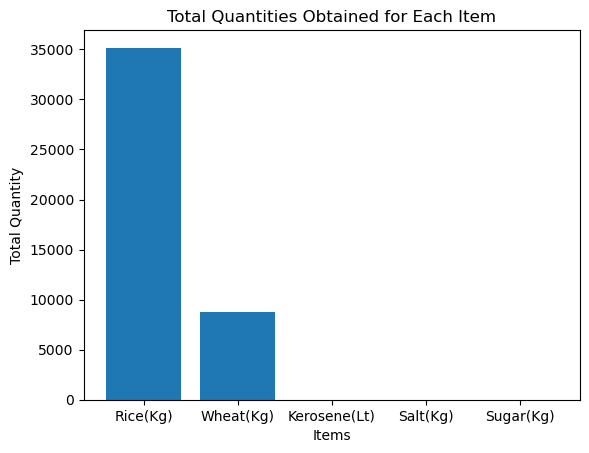

In [27]:
# Calculate total quantities obtained for each item in the last 5 months
total_quantities = merge[['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']].sum()
print(total_quantities)


# Create a bar chart to visualize the total quantities obtained
plt.bar(total_quantities.index, total_quantities.values)
plt.xlabel('Items')
plt.ylabel('Total Quantity')
plt.title('Total Quantities Obtained for Each Item')
plt.show()

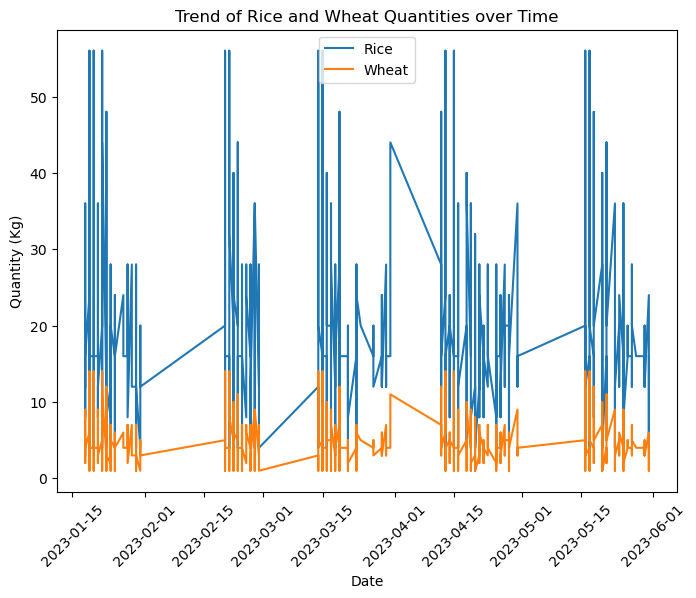

In [28]:
# Create a line chart to visualize the trend of rice and wheat quantities over time
merge['Date'] = pd.to_datetime(merge['Date'], format='%d-%m-%Y')


merge = merge.sort_values('Date')

plt.figure(figsize=(8, 6))  # Set the figure size as desired (width, height)
plt.plot(merge['Date'], merge['Rice(Kg)'], label='Rice')
plt.plot(merge['Date'], merge['Wheat(Kg)'], label='Wheat')
plt.xlabel('Date')
plt.ylabel('Quantity (Kg)')
plt.title('Trend of Rice and Wheat Quantities over Time')
plt.legend()

# Tilt the x-labels
plt.xticks(rotation=45)

plt.show()

In [29]:
total_transaction_per_card = merge['Rationcard no'].value_counts()

print(total_transaction_per_card)

202006870507    5
202001798611    5
202001798492    5
202001798490    5
202007184206    5
               ..
202800678921    1
202006953879    1
202007581219    1
202007581075    1
202006211068    1
Name: Rationcard no, Length: 405, dtype: int64


In [30]:
total_transactions_per_months = merge['Rationcard no'].nunique()
print('Total transactions every months :', total_transactions_per_months)

Total transactions every months : 405


In [31]:
# may_trans = merge[(merge['Date'].dt.month == 5)]
# may_trans
                   

In [32]:
total_trans_per_commodity_per_card = merge.groupby('Rationcard no')['Rice(Kg)','Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)'].sum().sort_values(by=['Rice(Kg)','Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)'], ascending=False)
print(total_trans_per_commodity_per_card)

               Rice(Kg)  Wheat(Kg)  Kerosene(Lt)  Salt(Kg)  Sugar(Kg)
Rationcard no                                                        
202001798491        280         70             0         0          0
202006874541        280         70             0         0          0
202001798478        240         60             0         0          0
202001798490        232         58             0         0          0
202001798632        220         55             0         0          0
...                 ...        ...           ...       ...        ...
202007581075          8          2             0         0          0
202800678921          8          2             0         0          0
202006953879          4          1             0         0          0
202007581219          4          1             0         0          0
202800075653          4          1             0         0          0

[405 rows x 5 columns]


C:\Users\imsan\AppData\Local\Temp\ipykernel_2492\3008637983.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_trans_per_commodity_per_card = merge.groupby('Rationcard no')['Rice(Kg)','Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)'].sum().sort_values(by=['Rice(Kg)','Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)'], ascending=False)


In [33]:
merge.head(10)

,Sl No,ID,Rationcard no,Card Type,Member Name,Date of Transaction,Date,Time,Rice(Kg),Wheat(Kg),Kerosene(Lt),Salt(Kg),Sugar(Kg)
382,383,383,202006870507,P.H.,शक्ति कुम्ब्कार,18-01-2023 10:22:05 AM,2023-01-18,10:22:05 AM,12,3,0,0,0
360,361,361,202007074144,P.H.,गोपाल रवानी,18-01-2023 01:19:46 PM,2023-01-18,01:19:46 PM,12,3,0,0,0
361,362,362,202001798541,P.H.,भावनि देवी,18-01-2023 01:06:21 PM,2023-01-18,01:06:21 PM,16,4,0,0,0
362,363,363,202001798709,P.H.,रोहीत रवानी,18-01-2023 12:57:52 PM,2023-01-18,12:57:52 PM,20,5,0,0,0
363,364,364,202001798682,P.H.,दशरथ रवा नी,18-01-2023 12:43:55 PM,2023-01-18,12:43:55 PM,12,3,0,0,0
364,365,365,202005709148,P.H.,काली चरण रवानी,18-01-2023 12:42:04 PM,2023-01-18,12:42:04 PM,12,3,0,0,0
365,366,366,202006779613,P.H.,दीपाली देवी,18-01-2023 12:36:59 PM,2023-01-18,12:36:59 PM,16,4,0,0,0
367,368,368,202000774191,P.H.,अखिलेश पांडॆय़,18-01-2023 12:21:48 PM,2023-01-18,12:21:48 PM,12,3,0,0,0
368,369,369,202001798530,P.H.,सानुवाला देवी,18-01-2023 12:18:22 PM,2023-01-18,12:18:22 PM,28,7,0,0,0
369,370,370,202001798477,P.H.,शकुंतला devi,18-01-2023 12:11:46 PM,2023-01-18,12:11:46 PM,32,8,0,0,0


In [34]:
average_quantities = merge.groupby('Member Name')[['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']].mean()
print(average_quantities)

                    Rice(Kg)  Wheat(Kg)  Kerosene(Lt)  Salt(Kg)  Sugar(Kg)
Member Name                                                               
AJIT RAWANI             24.0        6.0           0.0       0.0        0.0
AKASH KUMAR RAWANI      20.0        5.0           0.0       0.0        0.0
ANITA DEVI              12.0        3.0           0.0       0.0        0.0
BHARTI DEVI              8.0        2.0           0.0       0.0        0.0
Dinesh Kumbhakar        16.0        4.0           0.0       0.0        0.0
...                      ...        ...           ...       ...        ...
फ़ुलकुमारी देवी          16.0        4.0           0.0       0.0        0.0
फ़ुलु देवी               16.0        4.0           0.0       0.0        0.0
फ़ू्ळवती देवी            12.0        3.0           0.0       0.0        0.0
फ़क़ीर रवानी              16.0        4.0           0.0       0.0        0.0
‍विकास कुमार            20.0        5.0           0.0       0.0        0.0

[490 rows x 5 columns]


In [35]:
# average_quantities.plot(kind='bar', figsize=(10,6))
# plt.xlabel('Member Name')
# plt.ylabel('Average Quantity')
# plt.title('Average Quantity Obtain per Member')
# plt.show()

In [36]:
total_quantities = merge.groupby('Member Name')[['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']].sum().sort_values(by= ['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)'], ascending=False)
print(total_quantities)

                 Rice(Kg)  Wheat(Kg)  Kerosene(Lt)  Salt(Kg)  Sugar(Kg)
Member Name                                                            
मीना देवी             356         89             0         0          0
रीना देवी             340         85             0         0          0
विश्वनाथ रवानी        324         81             0         0          0
चिंता देवी            308         77             0         0          0
सरस्वती देवी          292         73             0         0          0
...                   ...        ...           ...       ...        ...
शिव नाथ सिन्‍हा         8          2             0         0          0
सावित्री देवी           8          2             0         0          0
SUNITA DEVI             4          1             0         0          0
जमुना देवी              4          1             0         0          0
मधुबाला देवी            4          1             0         0          0

[490 rows x 5 columns]


In [37]:
max_quantities = merge.groupby('Member Name')[['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']].max().sort_values(by= ['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)'], ascending=False)
print(max_quantities)

                        Rice(Kg)  Wheat(Kg)  Kerosene(Lt)  Salt(Kg)  Sugar(Kg)
Member Name                                                                   
आनंद कुम्भकार                 56         14             0         0          0
उपासि देवी                    56         14             0         0          0
कार्तिक कुंभकार               56         14             0         0          0
गोविन्द कुम्भकार              56         14             0         0          0
मीना देवी                     56         14             0         0          0
...                          ...        ...           ...       ...        ...
मधुबाला देवी                   4          1             0         0          0
रविन्द्र प्रसाद गुप्ता         4          1             0         0          0
राजेन्द्र नोनिय                4          1             0         0          0
रेखा कुमारी                    4          1             0         0          0
सोनी देवी                      4          1         

In [38]:
min_quantities = merge.groupby('Member Name')[['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']].min().sort_values(by= ['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)'], ascending=True)
print(min_quantities)

                       Rice(Kg)  Wheat(Kg)  Kerosene(Lt)  Salt(Kg)  Sugar(Kg)
Member Name                                                                  
GANESH BESRA                  4          1             0         0          0
NEHA DEVI                     4          1             0         0          0
SHIV SHANKAR PRAMANIK         4          1             0         0          0
SUNITA DEVI                   4          1             0         0          0
SUNITA RAJWAR                 4          1             0         0          0
...                         ...        ...           ...       ...        ...
विजोला देवी                  48         12             0         0          0
आनंद कुम्भकार                56         14             0         0          0
उपासि देवी                   56         14             0         0          0
कार्तिक कुंभकार              56         14             0         0          0
गोविन्द कुम्भकार             56         14             0        

In [39]:
# transaction_count = merge.groupby('Member Name')[['Rationcard no', 'Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']].value_counts()
# print(transaction_count)

In [40]:
member_transaction_count = merge.groupby('Member Name')[['Rationcard no']].value_counts().sort_values(ascending=False)

for member, count in member_transaction_count.items():
    print(f"Member: {member}\tcount: {count}")

Member: ('भास्कर कुम्भकार', 202007060181)	count: 5
Member: ('देवंती देवी', 202001798557)	count: 5
Member: ('जन्मंजय कुमार रवानी', 202007008098)	count: 5
Member: ('राजेश रवानी', 202006955375)	count: 5
Member: ('जयंत कुमार विद', 202006943298)	count: 5
Member: ('जलधर प्रमाणिक', 202001798670)	count: 5
Member: ('राजेश रवानी', 202006979299)	count: 5
Member: ('जोसना देवी', 202007073085)	count: 5
Member: ('झन्टु कुंभकार', 202001798482)	count: 5
Member: ('झुल देवी', 202001798469)	count: 5
Member: ('राजेश कुमार रवानी', 202007034749)	count: 5
Member: ('तपेश्वर कुमार महतो', 202006980746)	count: 5
Member: ('तरु बाला देवी', 202001798488)	count: 5
Member: ('राजेन्द्र नोनिय', 202800803852)	count: 5
Member: ('तारा पद रवानी', 202001798603)	count: 5
Member: ('राजीव कुमार ठाकुर', 202007581073)	count: 5
Member: ('त्रिपद रवानी', 202005726261)	count: 5
Member: ('दशरथ रवा नी', 202001798682)	count: 5
Member: ('दिनेश रवानी', 202005709715)	count: 5
Member: ('राजीव कुमार गिरी', 202007071831)	count: 5
Member: ('दि

     Rice(Kg)  Wheat(Kg)  Kerosene(Lt)  Salt(Kg)  Sugar(Kg)
382        12          3             0         0          0
360        12          3             0         0          0
361        16          4             0         0          0
362        20          5             0         0          0
363        12          3             0         0          0
..        ...        ...           ...       ...        ...
1          20          5             0         0          0
0           4          1             0         0          0
6          16          4             0         0          0
4           8          2             0         0          0
3          16          4             0         0          0

[1940 rows x 5 columns]


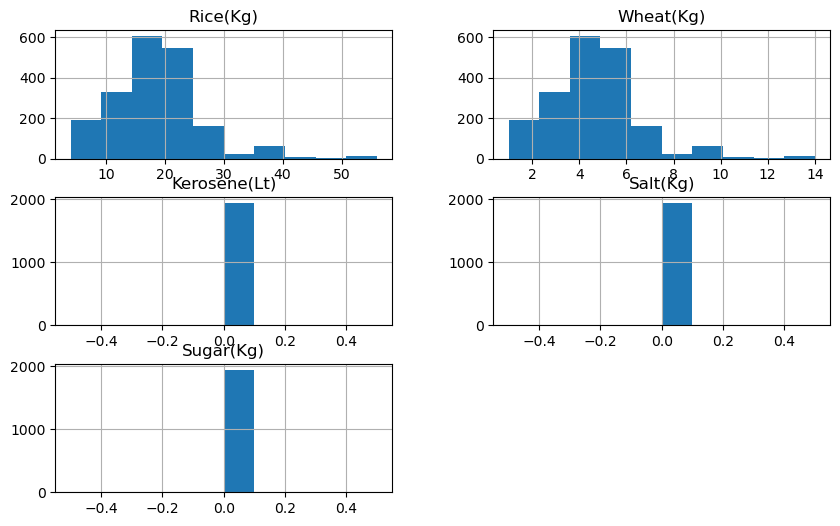

In [41]:
quantity_columns = ['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']
quantity_data = merge[quantity_columns]
print(quantity_data)

quantity_data.hist(figsize=(10,6), bins=10)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantities')
plt.legend(quantity_columns)
plt.show()

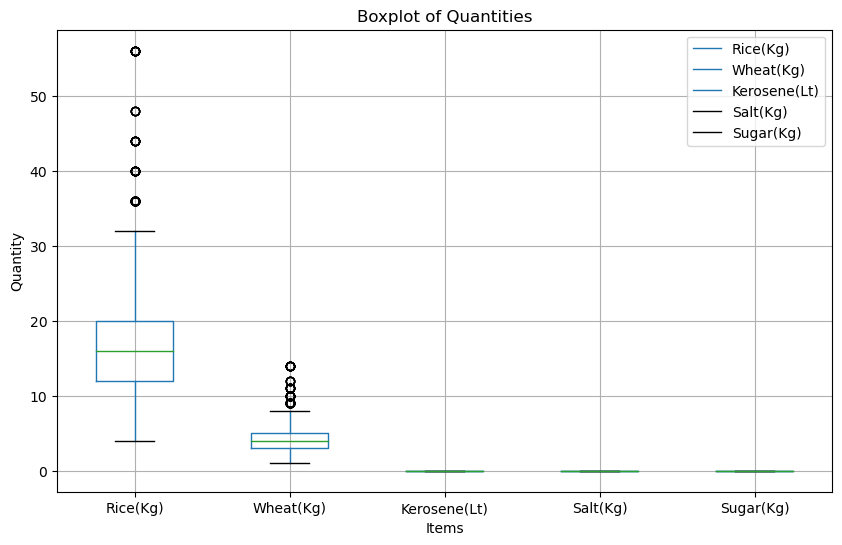

In [42]:
quantity_data.boxplot(figsize=(10,6))
plt.xlabel('Items')
plt.ylabel('Quantity')
plt.title('Boxplot of Quantities')
plt.legend(quantity_columns)
plt.show()

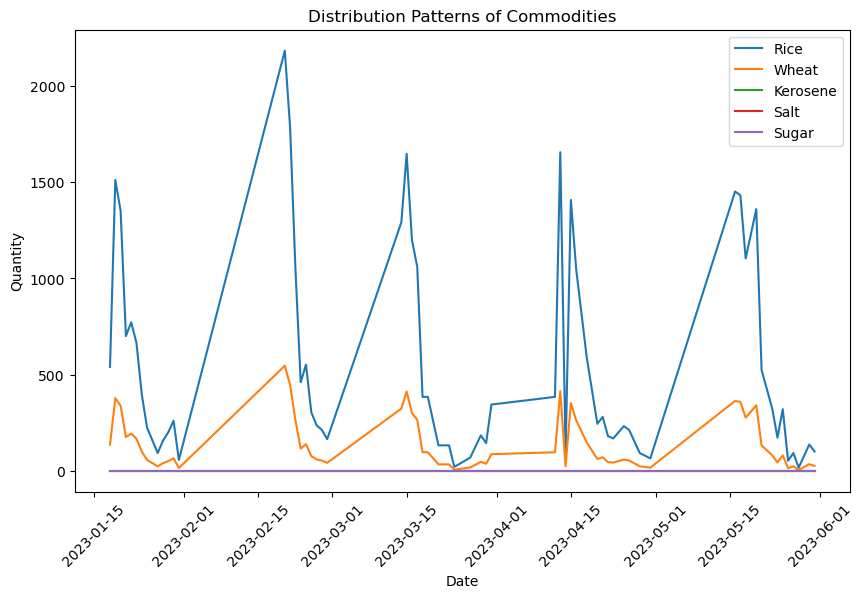

In [43]:
# Convert the 'Date' column to datetime format


# Group the data by date and calculate the sum of each commodity
daily_totals = merge.groupby('Date')[['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']].sum()

# Plot the distribution patterns over time
plt.figure(figsize=(10, 6))
plt.plot(daily_totals.index, daily_totals['Rice(Kg)'], label='Rice')
plt.plot(daily_totals.index, daily_totals['Wheat(Kg)'], label='Wheat')
plt.plot(daily_totals.index, daily_totals['Kerosene(Lt)'], label='Kerosene')
plt.plot(daily_totals.index, daily_totals['Salt(Kg)'], label='Salt')
plt.plot(daily_totals.index, daily_totals['Sugar(Kg)'], label='Sugar')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Distribution Patterns of Commodities')
plt.legend()
plt.xticks(rotation=45)
plt.show()


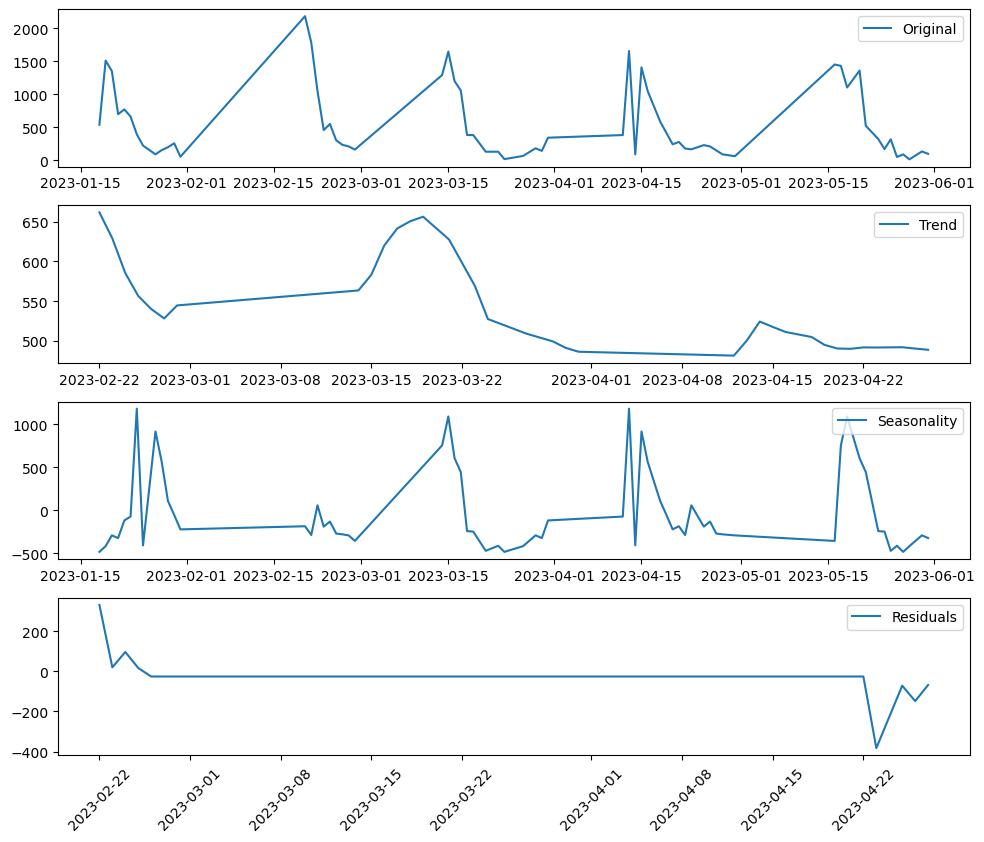

In [44]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_totals['Rice(Kg)'], model='additive', period=30)
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Plot the seasonal decomposition components
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(daily_totals.index, daily_totals['Rice(Kg)'], label='Original')
plt.legend(loc='upper right')

plt.subplot(4, 1, 2)
plt.plot(daily_totals.index, trend, label='Trend')
plt.legend(loc='upper right')

plt.subplot(4, 1, 3)
plt.plot(daily_totals.index, seasonal, label='Seasonality')
plt.legend(loc='upper right')

plt.subplot(4, 1, 4)
plt.plot(daily_totals.index, residual, label='Residuals')
plt.legend(loc='upper right')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [45]:
# Perform Augmented Dickey-Fuller test for stationarity
result = adfuller(daily_totals['Rice(Kg)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Detect outliers using 3 standard deviations from the mean
mean = daily_totals['Rice(Kg)'].mean()
std = daily_totals['Rice(Kg)'].std()
threshold = 3 * std
outliers = daily_totals[daily_totals['Rice(Kg)'] > mean + threshold]
print('Outliers:')
print(outliers)

ADF Statistic: -4.447088556048023
p-value: 0.0002447718811211001
Outliers:
Empty DataFrame
Columns: [Rice(Kg), Wheat(Kg), Kerosene(Lt), Salt(Kg), Sugar(Kg)]
Index: []


## Correlation


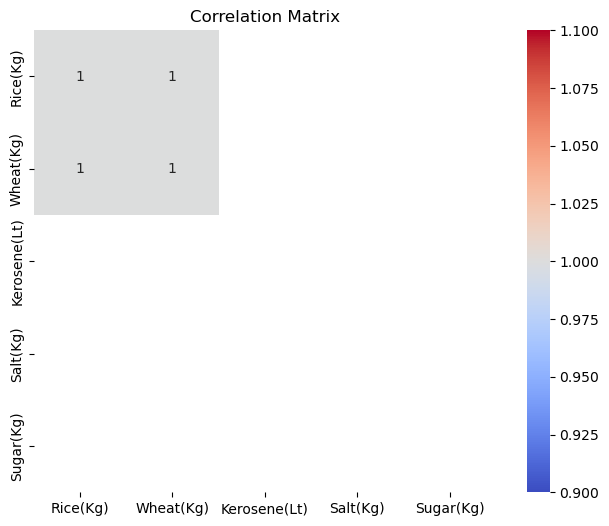

In [46]:
# Calculate the correlation matrix
correlation_matrix = merge[['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']].corr()


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [47]:
# Calculate the correlation matrix for each cardtype
correlation_by_cardtype = merge.groupby('Card Type')[['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']].corr()

# Print the correlation matrix for each cardtype
print(correlation_by_cardtype)

                        Rice(Kg)  Wheat(Kg)  Kerosene(Lt)  Salt(Kg)  Sugar(Kg)
Card Type                                                                     
AAY       Rice(Kg)           NaN        NaN           NaN       NaN        NaN
          Wheat(Kg)          NaN        NaN           NaN       NaN        NaN
          Kerosene(Lt)       NaN        NaN           NaN       NaN        NaN
          Salt(Kg)           NaN        NaN           NaN       NaN        NaN
          Sugar(Kg)          NaN        NaN           NaN       NaN        NaN
P.H.      Rice(Kg)           1.0        1.0           NaN       NaN        NaN
          Wheat(Kg)          1.0        1.0           NaN       NaN        NaN
          Kerosene(Lt)       NaN        NaN           NaN       NaN        NaN
          Salt(Kg)           NaN        NaN           NaN       NaN        NaN
          Sugar(Kg)          NaN        NaN           NaN       NaN        NaN


In [48]:
# Compare correlation coefficients
rice_wheat_correlation = correlation_matrix.loc['Rice(Kg)', 'Wheat(Kg)']
rice_kerosene_correlation = correlation_matrix.loc['Rice(Kg)', 'Kerosene(Lt)']


print("Correlation between Rice and Wheat:", rice_wheat_correlation)
print("Correlation between Rice and Kerosene:", rice_kerosene_correlation)


Correlation between Rice and Wheat: 1.0
Correlation between Rice and Kerosene: nan


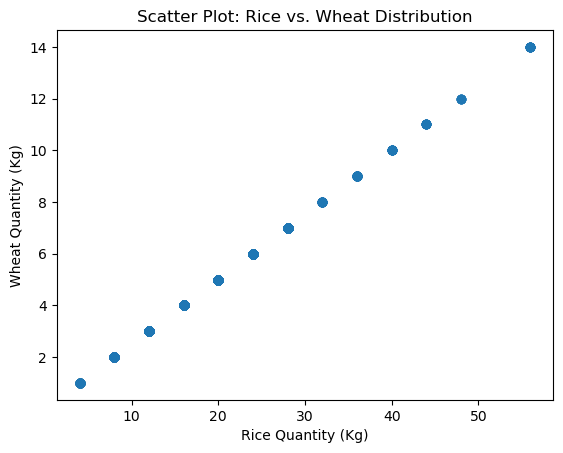

In [49]:
# Create a scatter plot of Rice vs. Wheat distribution quantities
plt.scatter(merge['Rice(Kg)'], merge['Wheat(Kg)'])
plt.xlabel('Rice Quantity (Kg)')
plt.ylabel('Wheat Quantity (Kg)')
plt.title('Scatter Plot: Rice vs. Wheat Distribution')
plt.show()

In [50]:
# Compute the partial correlation between Rice and Wheat, controlling for Kerosene
partial_corr = pg.partial_corr(merge, x='Rice(Kg)', y='Wheat(Kg)', covar='Kerosene(Lt)')

# Print the partial correlation coefficient
print("Partial Correlation between Rice and Wheat:", partial_corr['r'].values[0])

Partial Correlation between Rice and Wheat: -1.0


C:\Users\imsan\anaconda3\lib\site-packages\pingouin\correlation.py:861: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
C:\Users\imsan\anaconda3\lib\site-packages\pingouin\correlation.py:862: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
C:\Users\imsan\anaconda3\lib\site-packages\pingouin\correlation.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  tval = r * np.sqrt(dof / (1 - r**2))
C:\Users\imsan\anaconda3\lib\site-packages\pingouin\effsize.py:152: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(stat)  # R-to-z transform


In [51]:
# Perform Pearson correlation test between Rice and Wheat
corr, p_value = pearsonr(merge['Rice(Kg)'], merge['Wheat(Kg)'])

# Print the correlation coefficient and p-value
print("Correlation between Rice and Wheat:", corr)
print("p-value:", p_value)

Correlation between Rice and Wheat: 0.9999999999999898
p-value: 0.0


In [52]:
# Calculate the correlation matrix
correlation_matrix = merge[['Rice(Kg)', 'Wheat(Kg)', 'Kerosene(Lt)', 'Salt(Kg)', 'Sugar(Kg)']].corr()

# Determine the direction of correlation between Rice and Wheat
rice_wheat_corr = correlation_matrix.loc['Rice(Kg)', 'Wheat(Kg)']

if rice_wheat_corr > 0:
    direction = "positive"
elif rice_wheat_corr < 0:
    direction = "negative"
else:
    direction = "no correlation"

print("Correlation between Rice and Wheat:", rice_wheat_corr)
print("Direction of correlation:", direction)

Correlation between Rice and Wheat: 1.0
Direction of correlation: positive


In [53]:
# Calculate the lagged correlation between Rice and Wheat with a lag of 1 time step (1 day)
rice = merge['Rice(Kg)']
wheat = merge['Wheat(Kg)']
lagged_corr = rice.corr(wheat.shift(1))

print("Lagged Correlation between Rice and Wheat (1-day lag):", lagged_corr)

Lagged Correlation between Rice and Wheat (1-day lag): 0.011444519861161876


## Time Series Analysis

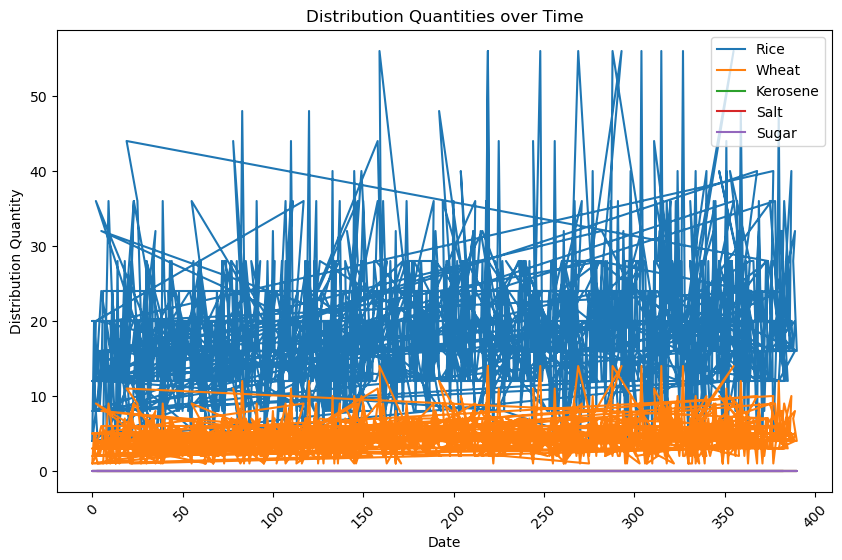

In [54]:
# Plot the distribution quantities of rice, wheat, kerosene, salt, and sugar over time
plt.figure(figsize=(10, 6))
plt.plot(merge.index, merge['Rice(Kg)'], label='Rice')
plt.plot(merge.index, merge['Wheat(Kg)'], label='Wheat')
plt.plot(merge.index, merge['Kerosene(Lt)'], label='Kerosene')
plt.plot(merge.index, merge['Salt(Kg)'], label='Salt')
plt.plot(merge.index, merge['Sugar(Kg)'], label='Sugar')
plt.xlabel('Date')
plt.ylabel('Distribution Quantity')
plt.title('Distribution Quantities over Time')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

C:\Users\imsan\AppData\Local\Temp\ipykernel_2492\2836075337.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Card Type', 'Date', 'Date of Transaction', 'Member Name', 'Time'], dtype='object')
  moving_avg = merge.rolling(window=7).mean()


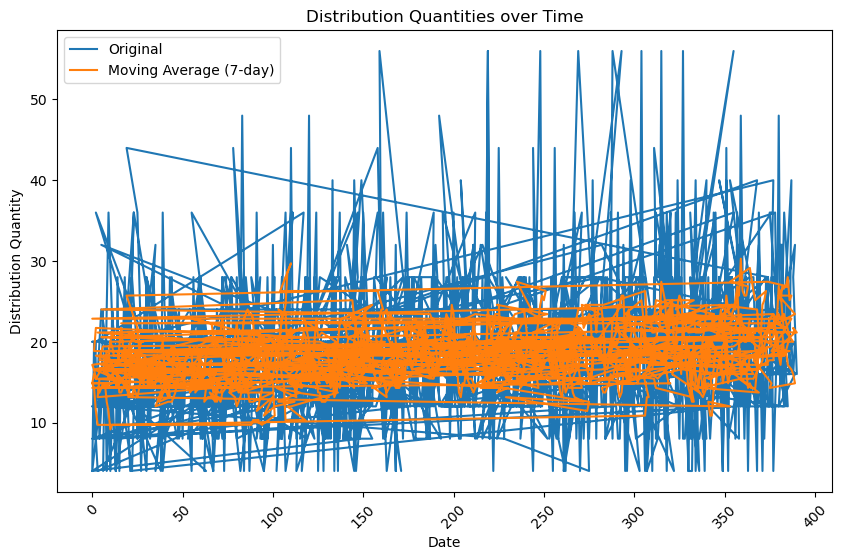

In [55]:
# Calculate the 7-day moving average of the distribution quantities
moving_avg = merge.rolling(window=7).mean()

# Plot the original distribution quantities and the moving average
plt.figure(figsize=(10, 6))
plt.plot(merge.index, merge['Rice(Kg)'], label='Original')
plt.plot(moving_avg.index, moving_avg['Rice(Kg)'], label='Moving Average (7-day)')
plt.xlabel('Date')
plt.ylabel('Distribution Quantity')
plt.title('Distribution Quantities over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()